In [9]:
import numpy as np
from astropy.coordinates import get_sun
import matplotlib.pylab as plt
%matplotlib inline
from lsst.sims.utils import _hpid2RaDec, _raDec2Hpid, Site
import astropy.units as u

In [4]:
mjd0 = 59853.5
site = Site(name='LSST')

In [28]:
step = 30./60./24.
mjds = np.arange(mjd0, mjd0+365, step)

In [29]:
mjds

array([ 59853.5       ,  59853.52083333,  59853.54166667, ...,
        60218.43750004,  60218.45833338,  60218.47916671])

In [30]:
from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris, EarthLocation, AltAz


In [31]:
site = Site('LSST')
loc = EarthLocation(site.longitude*u.deg, site.latitude*u.deg, site.height*u.m)

In [32]:
t = Time(mjds, format='mjd')

In [33]:
sun = get_sun(t)

In [34]:
sun_altAz = sun.transform_to(AltAz(obstime=t, location=loc))

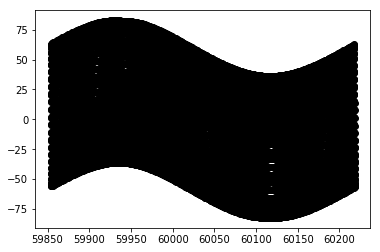

In [35]:
plt.plot(mjds, sun_altAz.alt, 'ko')

In [36]:
# Now I could make a function to find the mjd at a specific altitude
def interp_sun_postion(mjd0, mjd1, npts=100, cross_alt=-18., location=None):
    """
    """
    mjds = np.linspace(mjd0, mjd1, npts)
    t = Time(mjds, format='mjd')
    sun = get_sun(t)
    sun_altAz = sun.transform_to(AltAz(obstime=t, location=location))
    result = np.interp(cross_alt, sun_altAz.alt, mjds)
    return result